# Pre Loading Libraries

In [323]:
from keras.preprocessing.text import Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Data Loading & Exploration

In [324]:
df = pd.read_csv('train.csv')
display(df.head(100))
display(df.info())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

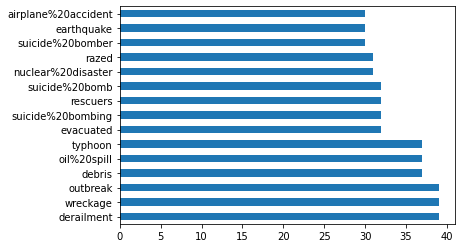

In [325]:
import seaborn as sns

df_dis = df[df['target']==1]
df_dis['keyword'].value_counts()[:15].plot(kind='barh')

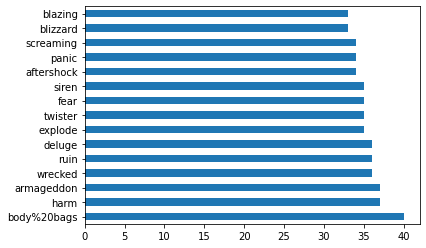

In [326]:
df_non_dis = df[df['target']==0]
df_non_dis['keyword'].value_counts()[:15].plot(kind='barh')

In [327]:
df_dis['keyword']
df_non_dis['keyword']

15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
         ...   
7581    wrecked
7582    wrecked
7584        NaN
7587        NaN
7593        NaN
Name: keyword, Length: 4342, dtype: object

In [328]:
df['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

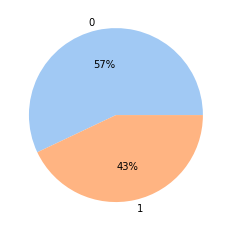

In [329]:
import seaborn as sns

#define data
data = [4342, 3271]
labels = ['0', '1']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


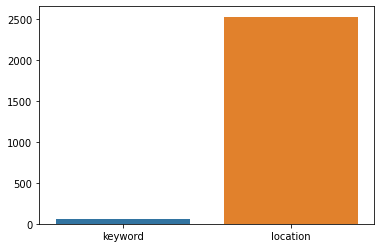

In [330]:
missing_cols = ['keyword', 'location']
sns.barplot(x=df[missing_cols].isnull().sum().index, y=df[missing_cols].isnull().sum().values)


In [331]:
display(df.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [332]:
df = df.drop(['id', 'keyword','location'], axis = 1)
df.head()


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


# Data Cleaning

**Make Characters to Lower Case**

In [333]:
df["CleanText"] = df["text"].apply(lambda x: x.lower())
df.head()

,text,target,CleanText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


**Remove unnecessary text: URL,HTML,Emojis, punctuation**

In [334]:
#remove URL

df["CleanText"] = df["CleanText"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "",x))


In [335]:
#remove numbers
'''
I decided not to remove number because experimentally based on the SVM, it does not yield better accurcay.
'''
#df["CleanText"] = df["CleanText"].apply(lambda x: re.sub(r'[0-9]', "",x))


In [336]:
def removeHTML(text):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

df["CleanText"] = df["CleanText"].apply(lambda x: removeHTML(x))


In [337]:
def removeEmojis(text):
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df["CleanText"] = df["CleanText"].apply(lambda x: removeEmojis(x))


In [338]:
def RemovePunctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [339]:
df["CleanText"] = df["CleanText"].apply(lambda x: RemovePunctuation(x))


In [340]:
def RemoveASCII(text):
  return re.sub(r'[^\x00-\x7f]', "", text)

df["CleanText"] = df["CleanText"].apply(lambda x: RemoveASCII(x))

In [341]:
df.head()


,text,target,CleanText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


#Data Preprocessing Part1 ([NLTK](https://www.nltk.org/index.html)) 

**Tokenizer**

In [342]:
df['TokenizedText'] = df['CleanText'].apply(nltk.word_tokenize)

In [343]:
display(df.head())

,text,target,CleanText,TokenizedText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


**Remove Stopwords**

In [344]:
stop = set(stopwords.words('english'))
df['RemoveStopWords'] = df['TokenizedText'].apply(lambda x: [word for word in x if word not in stop])
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


**PorterStemmer**

What is PorterStemmer in NLP?
Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

In [345]:
def doPorterStemmer(text):
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

df['PorterStemmer'] = df['RemoveStopWords'].apply(lambda x: doPorterStemmer(x))
df.head()

,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


**WordNetLemmatizer**

In [346]:
def doLemmatizeWord(text):
    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word) for word in text]
    return lemma

df['LemmatizedText'] = df['RemoveStopWords'].apply(lambda x: doLemmatizeWord(x))
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


**We decided to use Lemmatizer because some research told Lemmatizer have better performance.**

In [347]:
df['FINAL']=df['LemmatizedText'].apply(lambda x: ''.join(i+' ' for i in x))
df.head()

,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText,FINAL
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


In [348]:
#checking for the dataset.
df.to_csv("normalized_dataset.csv")

# Visualization with Seaborn barplot and WordCloud based on (Target-1 Target-0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


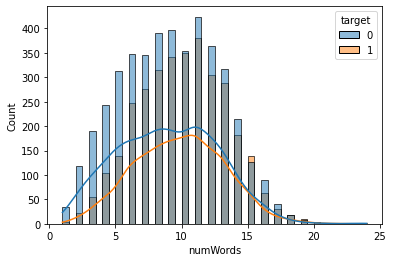

In [349]:
df['LemmatizedText']


df['numWords']= 0

for ind in df.index:
     #print(len(df['LemmatizedText'][ind]))
     df['numWords'][ind] = len(df['LemmatizedText'][ind])

sns.histplot(data=df, x="numWords", hue='target', kde=True)

In [350]:
!pip install git+https://git@github.com/kavgan/word_cloud.git

  Cloning https://****@github.com/kavgan/word_cloud.git to /tmp/pip-req-build-wy5rtvoy
  Running command git clone -q 'https://****@github.com/kavgan/word_cloud.git' /tmp/pip-req-build-wy5rtvoy


In [351]:
df_disaster = df[df['target']==1]
df_nodisater = df[df['target']==0]


In [352]:
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "said","you", "your", "yours", "yourself",
    "yourselves"])

In [353]:
from word_cloud.word_cloud_generator import WordCloud
from IPython.core.display import HTML

texts= df_disaster['FINAL']
wc=WordCloud(use_tfidf=False,stopwords=ENGLISH_STOP_WORDS)

embed_code=wc.get_embed_code(text=texts,random_color=False,topn=50)
HTML(embed_code)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [354]:
texts= df_nodisater['FINAL']
wc=WordCloud(use_tfidf=False,stopwords=ENGLISH_STOP_WORDS)

embed_code=wc.get_embed_code(text=texts,random_color=False,topn=50)
HTML(embed_code)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Data PreProcessing Part2(Word Embedding) to transform text to numerical feature set


**We will make three different numerical datasets**

**Bag Of Words using CounterVector**

In [355]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
cv_df = vectorizer.fit_transform(df['FINAL'])

vectorizer.get_feature_names_out()
print(cv_df.shape)

(7613, 16270)


**Visualization**


In [356]:
#cv_arr = cv_df.toarray()
#cv_arr_df = pd.DataFrame(data=cv_arr,columns = vectorizer.get_feature_names())
#desc = cv_arr_df.describe()
 
#dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
'''
dis_countvectorizer = CountVectorizer()
cv_disaster = dis_countvectorizer.fit_transform(df_disaster['FINAL'])

nodis_countvectorizer = CountVectorizer()
cv_nodisaster = nodis_countvectorizer.fit_transform(df_nodisater['FINAL'])

sorted_cv_dis = dict(sorted(dis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
sorted_cv_nodis = dict(sorted(nodis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
'''
#print(sorted_cv_dis)
#print(sorted_cv_nodis)

#print(dis_countvectorizer.vocabulary_.keys())

"\ndis_countvectorizer = CountVectorizer()\ncv_disaster = dis_countvectorizer.fit_transform(df_disaster['FINAL'])\n\nnodis_countvectorizer = CountVectorizer()\ncv_nodisaster = nodis_countvectorizer.fit_transform(df_nodisater['FINAL'])\n\nsorted_cv_dis = dict(sorted(dis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\nsorted_cv_nodis = dict(sorted(nodis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\n"

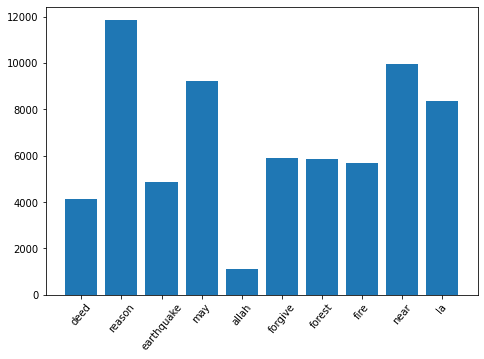

In [357]:
cv_key_list = list(vectorizer.vocabulary_.keys())
cv_values_list = list(vectorizer.vocabulary_.values())
#print(cv_key_list)
#print(cv_values_list)

import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(cv_key_list[:10], cv_values_list[:10])
plt.xticks(rotation=50)
plt.show()

**TF-IDF**


In [358]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvectorizer = TfidfVectorizer(ngram_range = (1,2))
tfidf_df = tfvectorizer.fit_transform(df['FINAL'])
print(tfidf_df.shape)

(7613, 63245)


 **visualization**

In [359]:
'''dis_tdidfvectorizer = CountVectorizer()
tdidf_disaster = dis_tdidfvectorizer.fit_transform(df_disaster['FINAL'])

nodis_tdidfvectorizer = CountVectorizer()
tdidf_nodisaster = nodis_tdidfvectorizer.fit_transform(df_nodisater['FINAL'])

#print(dis_tdidfvectorizer.vocabulary_)
#print(nodis_tdidfvectorizer.vocabulary_)

sorted_tdidf_dis = dict(sorted(dis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
sorted_tdidf_nodis = dict(sorted(nodis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))

#print(sorted_tdidf_dis)
#print(sorted_tdidf_nodis)'''

"dis_tdidfvectorizer = CountVectorizer()\ntdidf_disaster = dis_tdidfvectorizer.fit_transform(df_disaster['FINAL'])\n\nnodis_tdidfvectorizer = CountVectorizer()\ntdidf_nodisaster = nodis_tdidfvectorizer.fit_transform(df_nodisater['FINAL'])\n\n#print(dis_tdidfvectorizer.vocabulary_)\n#print(nodis_tdidfvectorizer.vocabulary_)\n\nsorted_tdidf_dis = dict(sorted(dis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\nsorted_tdidf_nodis = dict(sorted(nodis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\n\n#print(sorted_tdidf_dis)\n#print(sorted_tdidf_nodis)"

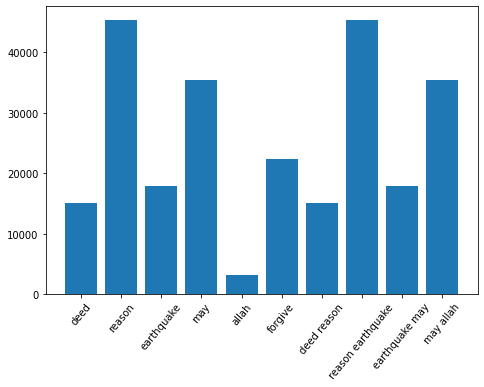

In [360]:
tfidf_key_list = list(tfvectorizer.vocabulary_.keys())
tfidf_values_list = list(tfvectorizer.vocabulary_.values())
#print(tfidf_key_list)
#print(tfidf_values_list)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tfidf_key_list[:10], tfidf_values_list[:10])
plt.xticks(rotation=50)
plt.show()

**Word2Vec**

In [361]:
from gensim.models import Word2Vec, KeyedVectors
import nltk
import multiprocessing

In [362]:
sentences = df['FINAL'].values
sentences = [nltk.word_tokenize(sent) for sent in sentences]


In [ ]:
#print(sentences)
#print(list(df['LemmatizedText']))

In [365]:
#w2v_size = 100
w2v_size = 300

In [366]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer


w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=w2v_size,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)


In [367]:
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(1441465, 2133030)

In [368]:
w2v_model.wv.similarity("fire", 'wildfire')

0.97697204

In [369]:
w2v_model.wv.most_similar(positive=["disaster"])


[('declares', 0.9978721141815186),
 ('sign', 0.997292697429657),
 ('marians', 0.9948339462280273),
 ('obama', 0.9941208362579346),
 ('declaration', 0.9940019845962524),
 ('saipan', 0.9926038384437561),
 ('typhoondevastated', 0.9880362153053284),
 ('northern', 0.987818717956543),
 ('abcnews', 0.8936284780502319),
 ('losdelsonido', 0.8934692144393921)]

In [370]:
w2v_model.wv.most_similar(positive=["evacuation"])


[('faan', 0.9996422529220581),
 ('order', 0.9995662569999695),
 ('ultimatum', 0.9993208646774292),
 ('noted', 0.9992741346359253),
 ('town', 0.9992557168006897),
 ('lifted', 0.9992402195930481),
 ('floated', 0.9992305040359497),
 ('innocent', 0.9992022514343262),
 ('disappeared', 0.99919593334198),
 ('todayng', 0.9991891384124756)]

In [371]:
w2v_model.wv.most_similar(positive=["injury"])


[('sure', 0.9997982978820801),
 ('seeing', 0.9997974634170532),
 ('w', 0.9997957944869995),
 ('offer', 0.9997949600219727),
 ('wee', 0.9997939467430115),
 ('shower', 0.9997938871383667),
 ('hate', 0.9997929334640503),
 ('changed', 0.9997914433479309),
 ('welcome', 0.9997908473014832),
 ('bare', 0.9997907876968384)]

In [372]:
words = list(w2v_model.wv.vocab)
#words

In [373]:
w2v_df = []
for sent in sentences:
    vw = np.zeros(w2v_size) 
    #one sentence has many words
    for word in sent:
        vw += w2v_model[word]
    #average
    vw = vw/len(sent)
    w2v_df.append(np.array(vw))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [374]:
print(len(w2v_df))
print(len(w2v_df[0]))

#print(w2v_model['earthquake'])

7613
300


## Word2Vec with Visualization

In [377]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def word2vec_scatterplot(model, word, list_names):

    arrays = np.empty((0, w2v_size), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('pink')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('skyblue')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality with PCA
    reduc = PCA(n_components=21).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


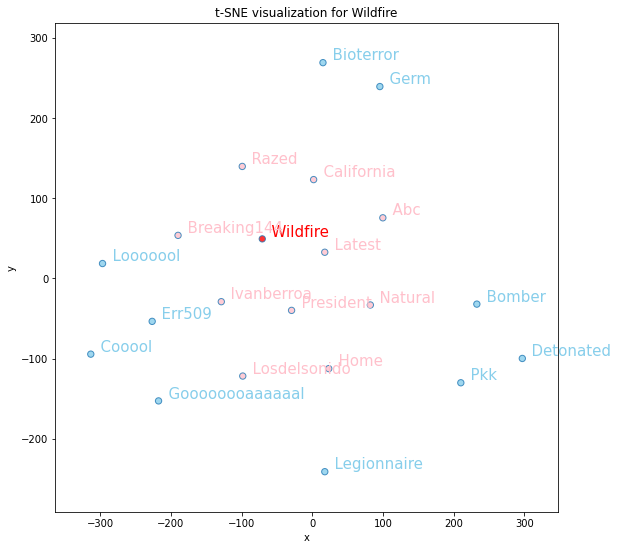

In [376]:
word2vec_scatterplot(w2v_model, 'wildfire', [i[0] for i in w2v_model.wv.most_similar(negative=["wildfire"])])

# Reduce Dimension PCA 

In [312]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

trans_w2v_df = StandardScaler().fit_transform(w2v_df)

#reduce dimention half
pca = PCA(n_components=100)
pca_trans_w2v_df = pca.fit_transform(trans_w2v_df)

print(pca_trans_w2v_df.shape) 

df_pca_visual = pd.DataFrame({'com1': pca_trans_w2v_df[:,1], 'com2': pca_trans_w2v_df[:,2]})
display(df_pca_visual.head())

df_pca_visual['target'] = df['target']
display(df_pca_visual.head())

#sns.scatterplot(data=df_pca_visual, x="com1", y="com2", hue="target")

(7613, 50)


,com1,com2
0,0.086897,-0.920850
1,0.237427,0.323826
2,-0.505460,-0.320311
3,-2.179619,3.138569
4,-1.488344,0.826640


,com1,com2,target
0,0.086897,-0.920850,1
1,0.237427,0.323826,1
2,-0.505460,-0.320311,1
3,-2.179619,3.138569,1
4,-1.488344,0.826640,1


In [259]:
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

trans_w2v_df = StandardScaler().fit_transform(w2v_df)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda_w2v_df = lda.fit_transform(trans_w2v_df, df['target'])
print(lda_w2v_df.shape) 


lda_w2v_df_visual = pd.DataFrame({'lda_com': lda_w2v_df[:,0]})
display(lda_w2v_df_visual.head())

lda_w2v_df_visual['target'] = df['target']
display(lda_w2v_df_visual.head())


import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="lda_com" ,y="target" , data=lda_w2v_df_visual)'''
  

'\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis\n\ntrans_w2v_df = StandardScaler().fit_transform(w2v_df)\n\n# apply Linear Discriminant Analysis\nlda = LinearDiscriminantAnalysis(n_components=1)\nlda_w2v_df = lda.fit_transform(trans_w2v_df, df[\'target\'])\nprint(lda_w2v_df.shape) \n\n\nlda_w2v_df_visual = pd.DataFrame({\'lda_com\': lda_w2v_df[:,0]})\ndisplay(lda_w2v_df_visual.head())\n\nlda_w2v_df_visual[\'target\'] = df[\'target\']\ndisplay(lda_w2v_df_visual.head())\n\n\nimport seaborn as sns\nsns.set_theme(style="whitegrid")\nax = sns.stripplot(x="lda_com" ,y="target" , data=lda_w2v_df_visual)'

(7613, 2)


,com1,com2
0,-1.183732,0.086897
1,1.562483,0.237427
2,0.201041,-0.505460
3,0.663771,-2.179619
4,-0.218311,-1.488344


,com1,com2,target
0,-1.183732,0.086897,1
1,1.562483,0.237427,1
2,0.201041,-0.505460,1
3,0.663771,-2.179619,1
4,-0.218311,-1.488344,1


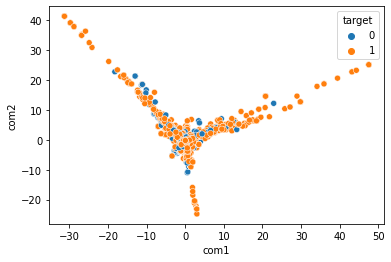

In [260]:
# This is for visualization code
from sklearn.decomposition import PCA

pca_visual = PCA(n_components=2)
df_visual = pca_visual.fit_transform(trans_w2v_df)
print(df_visual.shape) 

df_pca_visual = pd.DataFrame(df_visual, columns=['com1', 'com2'])
display(df_pca_visual.head())

df_pca_visual['target'] = df['target']
display(df_pca_visual.head())

sns.scatterplot(data=df_pca_visual, x="com1", y="com2", hue="target")


# Data Split

In [261]:
from sklearn.model_selection import train_test_split

cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)

# Model - SVM Best cv 0.800

In [262]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


 
def model_SVM(train_X, test_X, train_y, test_y) :
  svm_clf = svm.SVC()
  svm_clf= svm_clf.fit(train_X, train_y)
  pred_y = svm_clf.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))

**Training three datasets on Basic SVM and Prediction/Accuracy**

In [263]:
model_SVM(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
#model_SVM(svd_cv_train_X, svd_cv_test_X, svd_cv_train_Y, svd_cv_test_y)

model_SVM(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
#model_SVM(svd_tfidf_train_X, svd_tfidf_test_X, svd_tfidf_train_Y, svd_tfidf_test_y)

model_SVM(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_SVM(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)

accuracy_score: 0.799
Recall: 0.639
Precision: 0.864
F1 Score: 0.735
accuracy_score: 0.761
Recall: 0.493
Precision: 0.923
F1 Score: 0.643
accuracy_score: 0.649
Recall: 0.229
Precision: 0.864
F1 Score: 0.362
accuracy_score: 0.716
Recall: 0.466
Precision: 0.797
F1 Score: 0.588


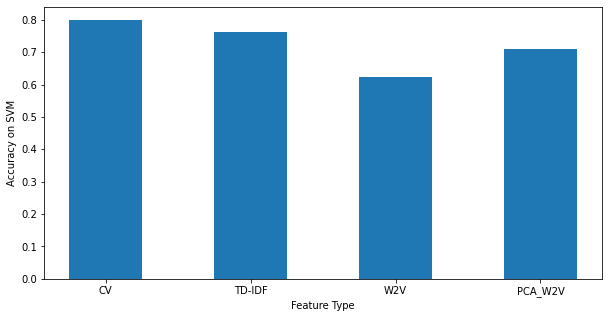

In [264]:
#visualization

data = {'CV':0.799, 'TD-IDF':0.761, 'W2V':0.624,'PCA_W2V':0.709}
datatype = list(data.keys())
acc = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(datatype, acc, width = 0.5)
 
plt.xlabel("Feature Type")
plt.ylabel("Accuracy on SVM")
plt.show()

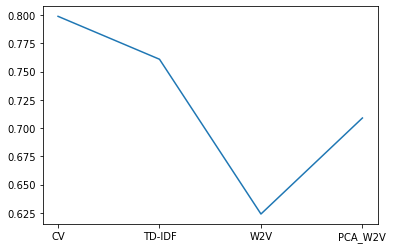

In [265]:
sns.lineplot(data=data)

**SVM with CounterVector has higher accuracy**

accuracy_score: 0.800
Recall: 0.668
Precision: 0.839
F1 Score: 0.744


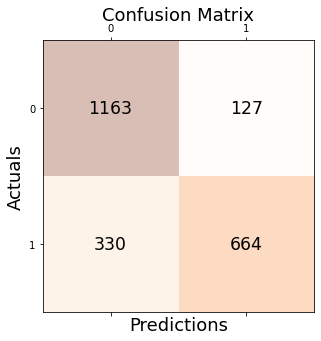

In [266]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def testModel(train_x, test_x, train_y, test_y, _c, _gam, _kn):
  SVM = svm.SVC(kernel=_kn, C=_c)
  SVM.fit(train_x, train_y)
  pred_y = SVM.predict(test_x)
  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))


  conf_matrix = confusion_matrix(y_true=test_y, y_pred=pred_y)
  #
  # Print the confusion matrix using Matplotlib
  #
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


'''
To find best tuning option

group_c = [5, 1, 0.1, 0.05, 0.01, 0.001]
group_gam = [5, 1, 0.1, 0.05, 0.01, 0.001]

for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'rbf')
'''
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'linear')
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'rbf')
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'poly')

testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'sigmoid')

# *LogisticRegression* best CV 0.800

In [267]:
from sklearn.linear_model import LogisticRegression

def model_Logistic(train_X, test_X, train_y, test_y) :
  logisticRegr = LogisticRegression()
  logisticRegr.fit(train_X, train_y)
  pred_y = logisticRegr.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))


In [268]:
model_Logistic(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_Logistic(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_Logistic(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_Logistic(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)

accuracy_score: 0.797
Recall: 0.693
Precision: 0.813
F1 Score: 0.749
accuracy_score: 0.776
Recall: 0.539
Precision: 0.908
F1 Score: 0.677
accuracy_score: 0.685
Recall: 0.372
Precision: 0.796
F1 Score: 0.507
accuracy_score: 0.753
Recall: 0.585
Precision: 0.794
F1 Score: 0.673


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**LogitricRegression with CountVector has better accuracy**

In [ ]:
#cv_train_X, cv_test_X, cv_train_Y, cv_test_y

'''
To find best tuning option

'''
group_c = [10, 5, 1, 0.1, 0.001]

for c in group_c:
    logistic_lasso = LogisticRegression(C=c, penalty='l1', tol=0.001, solver='saga', random_state=42,  max_iter=10000) #lasso
    logistic_ridge = LogisticRegression(C=c, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=10000)  #Ridge 
    l_ela = LogisticRegression(C=c, penalty='elasticnet', solver='saga', l1_ratio=0.5, tol=0.001, max_iter=10000)
    
    logistic_lasso.fit(cv_train_X, cv_train_Y.values.ravel())
    logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
    l_ela.fit(cv_train_X, cv_train_Y.values.ravel())
    
    coef_l1_LR = logistic_lasso.coef_.ravel()
    coef_l2_LR = logistic_ridge.coef_.ravel()
    coef_ela_LR = l_ela.coef_.ravel()
    
    # coef_l1_LR contains zeros due to the L1 sparsity inducing norm
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100 
    sparsity_l_ela = np.mean(coef_ela_LR == 0) * 100 

    print("\n C=%.5f" % c)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Ela penalty:", sparsity_l_ela))
    print("{:<40} {:.3f}".format("Score with L1 penalty:", logistic_lasso.score(cv_test_X, cv_test_y.values.ravel())))  #lasso score
    print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score
    print("{:<40} {:.3f}".format("Score with Ela penalty:",l_ela.score(cv_test_X, cv_test_y.values.ravel())))   #elastic score


 C=10.00000
Sparsity with L1 penalty:                53.47%
Sparsity with L2 penalty:                20.19%
Sparsity with Ela penalty:               38.10%
Score with L1 penalty:                   0.782
Score with L2 penalty:                   0.784
Score with Ela penalty:                  0.783

 C=5.00000
Sparsity with L1 penalty:                68.21%
Sparsity with L2 penalty:                20.19%
Sparsity with Ela penalty:               49.63%
Score with L1 penalty:                   0.783
Score with L2 penalty:                   0.787
Score with Ela penalty:                  0.788

 C=1.00000
Sparsity with L1 penalty:                93.60%
Sparsity with L2 penalty:                20.19%
Sparsity with Ela penalty:               81.05%
Score with L1 penalty:                   0.783
Score with L2 penalty:                   0.793
Score with Ela penalty:                  0.789

 C=0.10000
Sparsity with L1 penalty:                99.52%
Sparsity with L2 penalty:                20.19%


In [ ]:

logistic_ridge = LogisticRegression(C=0.1, penalty='l2', tol=0.001, solver='liblinear', random_state=42, max_iter=10000)  #Ridge 
logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score

logistic_ridge = LogisticRegression(C=0.18, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=10000)  #Ridge 
logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score


logistic_ridge = LogisticRegression(C=0.15, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=1000)  #Ridge 
logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score


logistic_ridge = LogisticRegression(C=0.15, penalty='l2', tol=0.001, solver='liblinear', random_state=42, max_iter=10000)  #Ridge 
logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score


Score with L2 penalty:                   0.798
Score with L2 penalty:                   0.799
Score with L2 penalty:                   0.800
Score with L2 penalty:                   0.799


accuracy_score: 0.800
Recall: 0.672
Precision: 0.837
F1 Score: 0.746


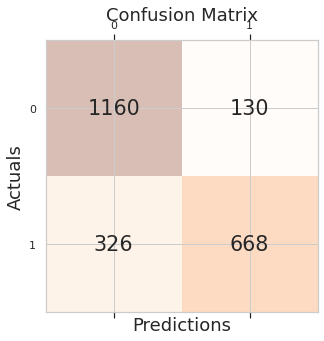

In [ ]:
''' BEST OPTION'''
#cv_train_X, cv_test_X, cv_train_Y, cv_test_y

logisticRegr = LogisticRegression(C=0.15, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=1000)
logisticRegr.fit(cv_train_X, cv_train_Y)
pred_y = logisticRegr.predict(cv_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, pred_y))


conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# DecisionTree best Tf-Idf 0.756

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def model_DT (train_X, test_X, train_y, test_y) :
  clf = DecisionTreeClassifier()
  clf.fit(train_X, train_y)
  pred_y = clf.predict(test_X)
  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))


In [ ]:
model_DT(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_DT(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_DT(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_DT(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)

accuracy_score: 0.749
Recall: 0.671
Precision: 0.731
F1 Score: 0.700
accuracy_score: 0.752
Recall: 0.684
Precision: 0.730
F1 Score: 0.706
accuracy_score: 0.665
Recall: 0.616
Precision: 0.614
F1 Score: 0.615
accuracy_score: 0.683
Recall: 0.621
Precision: 0.640
F1 Score: 0.630


**Decision Tree with Td-Idf is higher accuracy.**

In [ ]:
'''def test_dt(x_train, x_test, y_train, y_test) :
    print()
    for c_depth in [2, 4, 6, 8, 10, 12, 20, 30, None] : 
        print("model selection depth = {0}".format(c_depth))
        clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=c_depth)
        clf_gini.fit(x_train, y_train)
        y_pred = clf_gini.predict(x_test)
        print('gini accuracy_score: %.3f' % accuracy_score(y_test, y_pred))

        clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=c_depth)
        clf_gini.fit(x_train, y_train)
        y_pred = clf_gini.predict(x_test)
        print('entropy accuracy_score: %.3f' % accuracy_score(y_test, y_pred))'''

def test_dt(x_train, x_test, y_train, y_test) :
    print()
    for min_sp in [2, 4, 6, 8, 10, 12, 20] : 
    clf_gini = DecisionTreeClassifier(criterion='gini', min_samples_split=min_sp)
    clf_gini.fit(x_train, y_train)
    y_pred = clf_gini.predict(x_test)
    print('gini accuracy_score: %.3f' % accuracy_score(y_test, y_pred))

test_dt(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)


gini accuracy_score: 0.737
gini accuracy_score: 0.740
gini accuracy_score: 0.731
gini accuracy_score: 0.736
gini accuracy_score: 0.731
gini accuracy_score: 0.743
gini accuracy_score: 0.735


accuracy_score: 0.756
Recall: 0.675
Precision: 0.741
F1 Score: 0.706


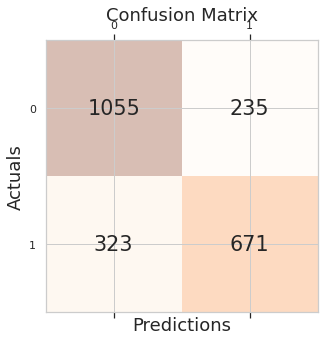

In [ ]:
#test_dt(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
'''
def __init__(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
'''


clf = DecisionTreeClassifier(min_samples_split=8)
clf.fit(tfidf_train_X, tfidf_train_Y)
pred_y = clf.predict(tfidf_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(tfidf_test_y, pred_y))
print('Recall: %.3f' % recall_score(tfidf_test_y, pred_y))
print('Precision: %.3f' % precision_score(tfidf_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(tfidf_test_y, pred_y))


conf_matrix = confusion_matrix(y_true=tfidf_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# RandomForestClassifier CV 0.799

In [197]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
 
def model_randomForestClf(train_X, test_X, train_y, test_y) :
  rf_clf = RandomForestClassifier(random_state=42)
  rf_clf = rf_clf.fit(train_X, train_y)
  pred_y = rf_clf.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))
'''
cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)
'''

model_randomForestClf(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_randomForestClf(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_randomForestClf(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_randomForestClf(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)


accuracy_score: 0.785
Recall: 0.643
Precision: 0.826
F1 Score: 0.723
accuracy_score: 0.768
Recall: 0.549
Precision: 0.869
F1 Score: 0.673
accuracy_score: 0.736
Recall: 0.580
Precision: 0.756
F1 Score: 0.657
accuracy_score: 0.754
Recall: 0.606
Precision: 0.780
F1 Score: 0.682


In [ ]:
'''
cv_train_X, cv_test_X, cv_train_Y, cv_test_y
'''
rf_clf = RandomForestClassifier(n_estimators=250, random_state=42,
                                class_weight="balanced", min_samples_split=12)
rf_clf = rf_clf.fit(cv_train_X, cv_train_Y)
pred_y = rf_clf.predict(cv_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, pred_y))

accuracy_score: 0.799
Recall: 0.704
Precision: 0.809
F1 Score: 0.753


# Xgboost best with pca_w2v - 0.786

In [378]:
from xgboost import XGBClassifier


def model_Xgboost(train_X, test_X, train_y, test_y) :
  xgb_clf = XGBClassifier()
  xgb_clf.fit(train_X, train_y)
  pred_y = xgb_clf.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))
  print()

model_Xgboost(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_Xgboost(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_Xgboost(np.array(w2v_train_X), w2v_test_X, w2v_train_Y, w2v_test_y)
model_Xgboost(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)


accuracy_score: 0.713
Recall: 0.402
Precision: 0.868
F1 Score: 0.550

accuracy_score: 0.729
Recall: 0.446
Precision: 0.865
F1 Score: 0.588

accuracy_score: 0.732
Recall: 0.571
Precision: 0.752
F1 Score: 0.650

accuracy_score: 0.750
Recall: 0.599
Precision: 0.776
F1 Score: 0.676



In [392]:
'''
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y
'''
xgb_clf = XGBClassifier(learning_rate =0.1,
     n_estimators=145,
     max_depth=10,
     min_child_weight=1,
     gamma=0.1,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)
print(xgb_clf)

xgb_clf = xgb_clf.fit(pca_w2v_train_X, pca_w2v_train_Y)
pred_y = xgb_clf.predict(pca_w2v_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(pca_w2v_test_y, pred_y))
print('Recall: %.3f' % recall_score(pca_w2v_test_y, pred_y))
print('Precision: %.3f' % precision_score(pca_w2v_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(pca_w2v_test_y, pred_y))
print()

XGBClassifier(colsample_bytree=0.8, gamma=0.1, max_depth=10, n_estimators=145,
              nthread=4, seed=27, subsample=0.8)
accuracy_score: 0.771
Recall: 0.632
Precision: 0.801
F1 Score: 0.706



# LSTM [GLOVE](https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt) - 0.817


In [228]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Dropout,LSTM,SimpleRNN,Embedding,Bidirectional,LSTM,GlobalMaxPool1D
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

In [229]:
tweets = df['FINAL'].values

In [230]:
#This Tokenizer is by Keras
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(tweets)
vocab_length = len(word_tokenizer.word_index) + 1

#None values is embedding by 0
def embedding_by_using_keras(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

In [231]:
longest_tweet = max(tweets, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_tweet))

#create values
padded_sentences = pad_sequences(embedding_by_using_keras(tweets), length_long_sentence, padding='post')

In [232]:
pad_X_train, pad_X_test, pad_y_train, pad_y_test = train_test_split(padded_sentences, df['target'], test_size=0.30, random_state=17)

## GLOVE

In [233]:
#create embedding dictionary from glove txt file of Stanford.
embeddings_dictionary = dict()
embedding_dim = 100

glove_file = open('glove.6B.100d.txt',encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [234]:
embeddings_dictionary['disaster'].shape

(100,)

In [235]:
#Create embedding vector matrix with vocaburay made by this tweets data set
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [236]:
print(embedding_matrix.shape)

(16303, 100)


In [237]:
def BLSTM():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights = [embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [238]:
model_LSTM = BLSTM()
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model_LSTM.fit(
    pad_X_train, 
    pad_y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = [pad_X_test, pad_y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
167/167 [==============================] - ETA: 0s - loss: 0.7593 - accuracy: 0.5620
Epoch 1: val_loss improved from inf to 0.65569, saving model to model.h5
167/167 [==============================] - 17s 68ms/step - loss: 0.7593 - accuracy: 0.5620 - val_loss: 0.6557 - val_accuracy: 0.7224 - lr: 0.0010
Epoch 2/7
167/167 [==============================] - ETA: 0s - loss: 0.6096 - accuracy: 0.6669
Epoch 2: val_loss improved from 0.65569 to 0.54091, saving model to model.h5
167/167 [==============================] - 11s 65ms/step - loss: 0.6096 - accuracy: 0.6669 - val_loss: 0.5409 - val_accuracy: 0.7877 - lr: 0.0010
Epoch 3/7
167/167 [==============================] - ETA: 0s - loss: 0.5522 - accuracy: 0.7422
Epoch 3: val_loss improved from 0.54091 to 0.45584, saving model to model.h5
167/167 [==============================] - 11s 66ms/step - loss: 0.5522 - accuracy: 0.7422 - val_loss: 0.4558 - val_accuracy: 0.7973 - lr: 0.0010
Epoch 4/7
167/167 [==============================]

In [239]:
loss, accuracy = model_LSTM.evaluate(pad_X_test, pad_y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

72/72 [==============================] - 1s 11ms/step - loss: 0.4236 - accuracy: 0.8179
Loss: 0.42356109619140625
Accuracy: 0.817863404750824


In [240]:
lstm_glv_pred_y = (model_LSTM.predict(pad_X_test) > 0.5).astype("int32")
lstm_glv_pred_y_prob = model_LSTM.predict(pad_X_test)

# LSTM with Word2Vec - 0.781

In [242]:
'''
w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
'''

'\nw2v_model = Word2Vec(min_count=1,\n                     window=2,\n                     size=100,\n                     sample=6e-5, \n                     alpha=0.03, \n                     min_alpha=0.0007, \n                     negative=20,\n                     workers=cores-1)\nw2v_model.build_vocab(sentences, progress_per=10000)\nw2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)\n'

In [243]:
# total numberof extracted words.
w2v_vocab=w2v_model.wv.vocab
print("The total number of words are : ",len(w2v_vocab))

w2v_vocab=list(w2v_vocab.keys())

w2v_dictionary={}
for word in w2v_vocab:
  w2v_dictionary[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(w2v_dictionary)) # should come equal to vocab size


The total number of words are :  16302
The no of key-value pairs :  16302


In [244]:
# now creating the embedding matrix
embedding_matrix_by_word2vec =np.zeros(shape=(vocab_length, 100))

for word, index in word_tokenizer.word_index.items():
  embedding_vector = w2v_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix_by_word2vec[index]=embedding_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [245]:
def BLSTM_W2V():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix_by_word2vec.shape[0], 
                        output_dim=embedding_matrix_by_word2vec.shape[1], 
                        weights = [embedding_matrix_by_word2vec], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [246]:
model_LSTM_W2V = BLSTM_W2V()
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model_LSTM_W2V.fit(
    pad_X_train, 
    pad_y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = [pad_X_test, pad_y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
167/167 [==============================] - ETA: 0s - loss: 0.7343 - accuracy: 0.5491
Epoch 1: val_loss improved from inf to 0.68190, saving model to model.h5
167/167 [==============================] - 25s 108ms/step - loss: 0.7343 - accuracy: 0.5491 - val_loss: 0.6819 - val_accuracy: 0.5827 - lr: 0.0010
Epoch 2/7
167/167 [==============================] - ETA: 0s - loss: 0.6659 - accuracy: 0.6179
Epoch 2: val_loss improved from 0.68190 to 0.64636, saving model to model.h5
167/167 [==============================] - 21s 123ms/step - loss: 0.6659 - accuracy: 0.6179 - val_loss: 0.6464 - val_accuracy: 0.6865 - lr: 0.0010
Epoch 3/7
167/167 [==============================] - ETA: 0s - loss: 0.5797 - accuracy: 0.7153
Epoch 3: val_loss improved from 0.64636 to 0.51295, saving model to model.h5
167/167 [==============================] - 17s 104ms/step - loss: 0.5797 - accuracy: 0.7153 - val_loss: 0.5129 - val_accuracy: 0.7561 - lr: 0.0010
Epoch 4/7
167/167 [============================

In [247]:
loss, accuracy = model_LSTM_W2V.evaluate(pad_X_test, pad_y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

72/72 [==============================] - 2s 24ms/step - loss: 0.5047 - accuracy: 0.7811
Loss: 0.5047365427017212
Accuracy: 0.7810857892036438


In [248]:
lstm_w2v_pred_y = (model_LSTM_W2V.predict(pad_X_test) > 0.5).astype("int32")
lstm_w2v_pred_y_prob = model_LSTM_W2V.predict(pad_X_test)

# Custom Ensemble
# (SVM+CV, LogisticR+CV, DT+tfidf, RandomF+cv, Xgboost+pca + LSTM+Glove) 0.81

In [202]:
'''
cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)
'''
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

cus_en_lr = LogisticRegression(C=0.15, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=1000)
cus_en_svm = svm.SVC(kernel='sigmoid', probability=True)
cus_en_dt = DecisionTreeClassifier(min_samples_split=8)
cus_en_rd = RandomForestClassifier(n_estimators=250, random_state=42,
                                class_weight="balanced", min_samples_split=12)
cus_xgb_clf = XGBClassifier(learning_rate =0.1,
     n_estimators=145,
     max_depth=10,
     min_child_weight=1,
     gamma=0.1,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)

cus_en_lr.fit(cv_train_X, cv_train_Y)
cus_en_svm.fit(cv_train_X, cv_train_Y)
cus_en_dt.fit(tfidf_train_X, tfidf_train_Y)
cus_en_rd.fit(cv_train_X, cv_train_Y)
cus_xgb_clf.fit(pca_w2v_train_X, pca_w2v_train_Y)

lr_pred_y = cus_en_lr.predict(cv_test_X)
svm_pred_y = cus_en_svm.predict(cv_test_X)
dt_pred_y = cus_en_dt.predict(tfidf_test_X)
rd_pred_y = cus_en_rd.predict(cv_test_X)
xgb_pred_y = cus_xgb_clf.predict(pca_w2v_test_X)


lr_pred_y_prob = cus_en_lr.predict_proba(cv_test_X)
svm_pred_y_prob = cus_en_svm.predict_proba(cv_test_X)
dt_pred_y_prob = cus_en_dt.predict_proba(tfidf_test_X)
rd_pred_y_prob = cus_en_rd.predict_proba(cv_test_X)
xgb_pred_y_prob = cus_xgb_clf.predict_proba(pca_w2v_test_X)


In [ ]:
lr_pred_y = cus_en_lr.predict(cv_test_X)
print(lr_pred_y)
prob = cus_en_lr.predict_proba(cv_test_X)
print(prob)

[1 0 0 ... 1 0 0]
[[0.31345312 0.68654688]
 [0.85636613 0.14363387]
 [0.78340883 0.21659117]
 ...
 [0.42238079 0.57761921]
 [0.74439378 0.25560622]
 [0.79686883 0.20313117]]


In [304]:
combined_pred_y = []

for idx in range(cv_test_y.shape[0]):
  # 6 models 4,5,6
  if (lr_pred_y[idx]+svm_pred_y[idx]+rd_pred_y[idx]+dt_pred_y[idx]+xgb_pred_y[idx]+lstm_glv_pred_y[idx]>3):
  #if (lr_pred_y[idx]+svm_pred_y[idx]+rd_pred_y[idx]+dt_pred_y[idx]+xgb_pred_y[idx]>=3):
    combined_pred_y.append(1);
  else :
    combined_pred_y.append(0);
    '''

  max_neg = max([lr_pred_y_prob[idx][0],svm_pred_y_prob[idx][0],dt_pred_y_prob[idx][0]])
  max_pos = max([lr_pred_y_prob[idx][1],svm_pred_y_prob[idx][1],dt_pred_y_prob[idx][1]])
  if (max_pos>max_neg) :
    combined_pred_y.append(1);
  else :
    combined_pred_y.append(0);
'''

In [297]:
combined_pred_y_prob = []
for idx in range(cv_test_y.shape[0]):
    max_neg = max([lr_pred_y_prob[idx][0],svm_pred_y_prob[idx][0],
                     rd_pred_y_prob[idx][0],xgb_pred_y_prob[idx][0], dt_pred_y_prob[idx][0],
                     lstm_glv_pred_y_prob[idx] ])
    max_pos = max([lr_pred_y_prob[idx][1],svm_pred_y_prob[idx][1],
                     rd_pred_y_prob[idx][1],xgb_pred_y_prob[idx][1], dt_pred_y_prob[idx][1],
                     lstm_glv_pred_y_prob[idx] ])
    if (max_neg<max_pos):
        combined_pred_y_prob.append(1);
    else :
        combined_pred_y_prob.append(0);


In [305]:
lr_pred_y.shape
combined_pred_y = np.asarray(combined_pred_y)
combined_pred_y_prob = np.asarray(combined_pred_y_prob)

In [306]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, combined_pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, combined_pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, combined_pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, combined_pred_y))



accuracy_score: 0.815
Recall: 0.674
Precision: 0.871
F1 Score: 0.760


In [299]:
print("\n probability: \n")

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, combined_pred_y_prob))
print('Recall: %.3f' % recall_score(cv_test_y, combined_pred_y_prob))
print('Precision: %.3f' % precision_score(cv_test_y, combined_pred_y_prob))
print('F1 Score: %.3f' % f1_score(cv_test_y, combined_pred_y_prob))




 probability: 

accuracy_score: 0.764
Recall: 0.675
Precision: 0.756
F1 Score: 0.713


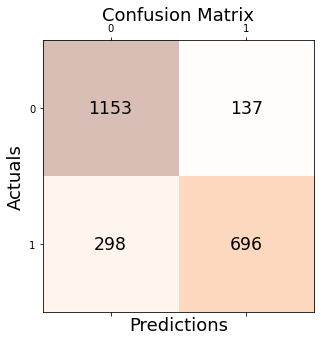

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=combined_pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.859
SVM: ROC AUC=0.854
DecisionTree: ROC AUC=0.763
RandomTree: ROC AUC=0.852
XGBoost: ROC AUC=0.823
LSTM GLOVE: ROC AUC=0.883


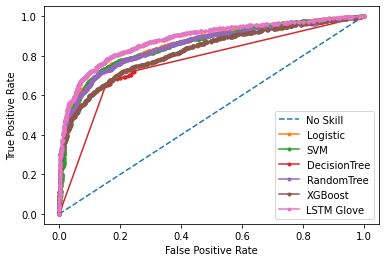

In [391]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


ns_probs = [0 for _ in range(len(cv_test_y))]
'''
lr_pred_y_prob = cus_en_lr.predict_proba(cv_test_X)
svm_pred_y_prob = cus_en_svm.predict_proba(cv_test_X)
dt_pred_y_prob = cus_en_dt.predict_proba(tfidf_test_X)
rd_pred_y_prob = cus_en_rd.predict_proba(cv_test_X)
xgb_pred_y_prob = cus_xgb_clf.predict_proba(pca_w2v_test_X)
lstm_glv_pred_y_prob
'''
lr_probs = lr_pred_y_prob[:, 1]
svm_probs = svm_pred_y_prob[:, 1]
dt_probs = dt_pred_y_prob[:, 1]
rd_probs = rd_pred_y_prob[:, 1]
xgb_probs = xgb_pred_y_prob[:, 1]

# calculate scores
ns_auc = roc_auc_score(cv_test_y, ns_probs)

lr_auc = roc_auc_score(cv_test_y, lr_probs)
svm_auc = roc_auc_score(cv_test_y, svm_probs)
dt_auc = roc_auc_score(cv_test_y, dt_probs)
rd_auc = roc_auc_score(cv_test_y, rd_probs)
xgb_auc = roc_auc_score(cv_test_y, xgb_probs)
lstm_glv_auc = roc_auc_score(cv_test_y, lstm_glv_pred_y_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('DecisionTree: ROC AUC=%.3f' % (dt_auc))
print('RandomTree: ROC AUC=%.3f' % (rd_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
print('LSTM GLOVE: ROC AUC=%.3f' % (lstm_glv_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(cv_test_y, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(cv_test_y, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(cv_test_y, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(tfidf_test_y, dt_probs)
rd_fpr, rd_tpr, _ = roc_curve(cv_test_y, rd_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(pca_w2v_test_y, xgb_probs)
lstm_glv_fpr, lstm_glv_tpr, _ = roc_curve(pad_y_test, lstm_glv_pred_y_prob)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='DecisionTree')
pyplot.plot(rd_fpr, rd_tpr, marker='.', label='RandomTree')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')
pyplot.plot(lstm_glv_fpr, lstm_glv_tpr, marker='.', label='LSTM Glove')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()